In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

Reading Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/yelp.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The number of Rows in our data

In [5]:
len(data)

10000

In [6]:
features = data.text
labels = data.stars - 1

Getting the Longest Sentence's number of words

In [7]:
data['split_text'] = data['text'].str.split()
data['length'] = data['split_text'].apply(lambda x: len(x))
np.max(data["length"])

945

Creating the Tokenizer

In [8]:
max_sequence_length = 900

tokenizer = Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    oov_token="<oov>",
    lower=True
    )

Updateing the tokenizer’s internal vocabulary based on a list of texts(features).

In [9]:
tokenizer.fit_on_texts(features)

Transforming each review into an array of integers

In [10]:
sequences = tokenizer.texts_to_sequences(features)

Getting the word-to-index dictionary from the tokenizer

In [11]:
word_index = tokenizer.word_index

Apply Padding to sequences

In [12]:
padded_sequences = pad_sequences(sequences, padding='pre', maxlen=max_sequence_length, truncating='pre')

Spliting the data into training and testing

In [13]:
train_reviews = padded_sequences[:9000]
train_labels = to_categorical(labels[:9000], num_classes=5)
test_reviews = padded_sequences[9000:]
test_labels = to_categorical(labels[9000:], num_classes=5)

Building the Model

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(40000, 100, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Training the Model

In [25]:
history = model.fit(
    train_reviews,
    train_labels,
    epochs=10,
    batch_size=30,
    validation_data=(test_reviews, test_labels)
)

Epoch 1/10
300/300 [==============================] - 28s 90ms/step - loss: 1.4357 - accuracy: 0.3484 - val_loss: 1.3869 - val_accuracy: 0.3830
Epoch 2/10
300/300 [==============================] - 15s 51ms/step - loss: 1.3959 - accuracy: 0.3662 - val_loss: 1.3297 - val_accuracy: 0.3800
Epoch 3/10
300/300 [==============================] - 11s 36ms/step - loss: 1.2618 - accuracy: 0.4219 - val_loss: 1.1825 - val_accuracy: 0.4520
Epoch 4/10
300/300 [==============================] - 6s 20ms/step - loss: 1.1168 - accuracy: 0.4851 - val_loss: 1.1024 - val_accuracy: 0.5080
Epoch 5/10
300/300 [==============================] - 6s 21ms/step - loss: 1.0147 - accuracy: 0.5458 - val_loss: 1.0569 - val_accuracy: 0.5250
Epoch 6/10
300/300 [==============================] - 5s 16ms/step - loss: 0.9244 - accuracy: 0.5951 - val_loss: 1.0387 - val_accuracy: 0.5470
Epoch 7/10
300/300 [==============================] - 4s 14ms/step - loss: 0.8492 - accuracy: 0.6394 - val_loss: 1.0349 - val_accuracy: 0.5

Evaluating the model on the test data

In [26]:
loss, accuracy = model.evaluate(test_reviews, test_labels)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


32/32 [==============================] - 0s 2ms/step - loss: 1.0763 - accuracy: 0.5570
Test loss: 1.0763270854949951
Test accuracy: 0.5569999814033508


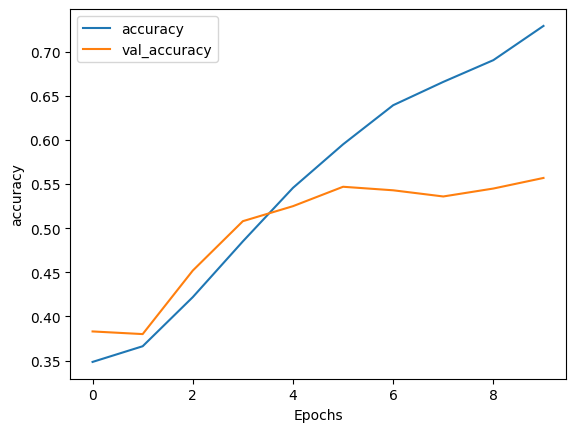

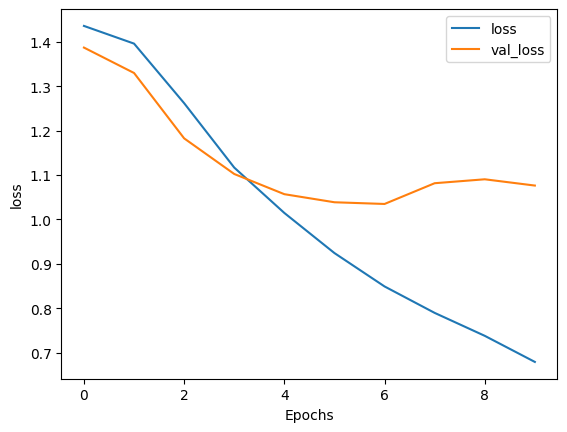

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Testing in a single review

In [28]:
review = "i did not like the food and i had the worst experience ever, i am not going back definitly"

review_sequence = tokenizer.texts_to_sequences([review])
review_padded = pad_sequences(review_sequence, maxlen=max_sequence_length,padding="pre",truncating="pre")

predictions = model.predict(review_padded)
predicted_label = np.argmax(predictions)

predicted_rating = predicted_label + 1

print("Predicted rating:", predicted_rating)

1/1 [==============================] - 0s 416ms/step
Predicted rating: 1
